In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
y=[]
for i in range(1,50):
    red=i
    black=50-i
    
    entropy=-((red/50)*np.log2(red/50) + (black/50)*np.log2(black/50))
    y.append(entropy)

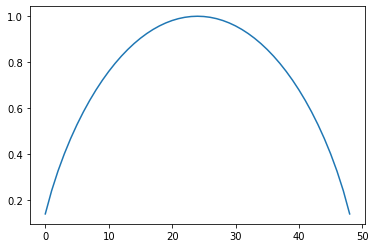

In [109]:
plt.plot(y)

# Just a implementation of non linear datasets which are made using make moons and implemented using Logistic Regression


In [27]:
from sklearn.datasets import make_moons

In [110]:
X,y=make_moons(100,noise=0,random_state=0)

In [111]:
Xh=np.hstack([np.ones([X.shape[0],1]),X])

In [112]:
coef=np.ones([X.shape[1],1])

In [113]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [114]:
yh=hypothesis(X,coef)

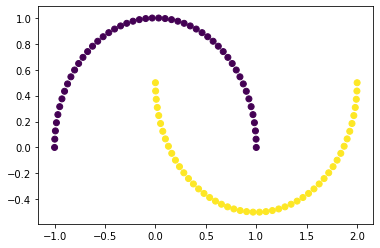

In [115]:
plt.scatter(X[:,0],X[:,1],c=y)

In [116]:
class LogisticRegression:
    
    def __init__(self,lr=1,itrs=100):
        self.itrs=itrs
        self.lr=lr
        
    def fit(self,X,y):
        self.X=np.hstack([np.ones([X.shape[0],1]),X])
        self.y=y.reshape(-1,1)
        self.theta=np.zeros((self.X.shape[1],1))
        
        for i in range(self.itrs):
            self.gradient_dec()
        
    def gradient_dec(self):
        d_theta=self.gradient()
        self.theta += d_theta
    
    def gradient(self):
        yh=LogisticRegression.hypothesis(self.X,self.theta)
        d_theta=np.mean((yh-self.y) * self.X, axis=0)
        return d_theta.reshape(-1,1)
    
    
    def predict(self,X):
        X=np.hstack([np.ones([X.shape[0],1]),X])
        yp=LogisticRegression.hypothesis(X,self.theta)
        return yp.astype(int)
        
    
    def score(self,X,y):
        yh=self.predict(X)
        y=y.reshape(-1,1)
        return np.sum(yh==y)/len(y)
        
        
        
    @classmethod
    def hypothesis(cls,X,theta):
        z=np.dot(X,theta) # Here y is X.theta  
        return 1/(1+np.exp(-z))
        

In [117]:
model=LogisticRegression()

In [118]:
model.fit(X,y)

In [119]:
yh=model.predict(X)

In [120]:
theta=model.theta

In [121]:
intercept=-theta[0]/theta[2]
slope=-theta[1]/theta[2]         # Find it from y=mx+c form for multivariate 

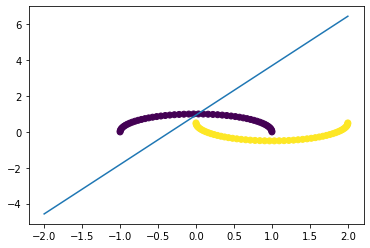

In [122]:
x_range=np.linspace(-2,2,4)
y_values=x_range*slope +intercept
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_range,y_values)


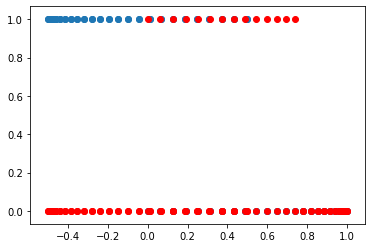

In [123]:
plt.scatter(X[:,1],y)
plt.scatter(X[:,1],yh,c="r")